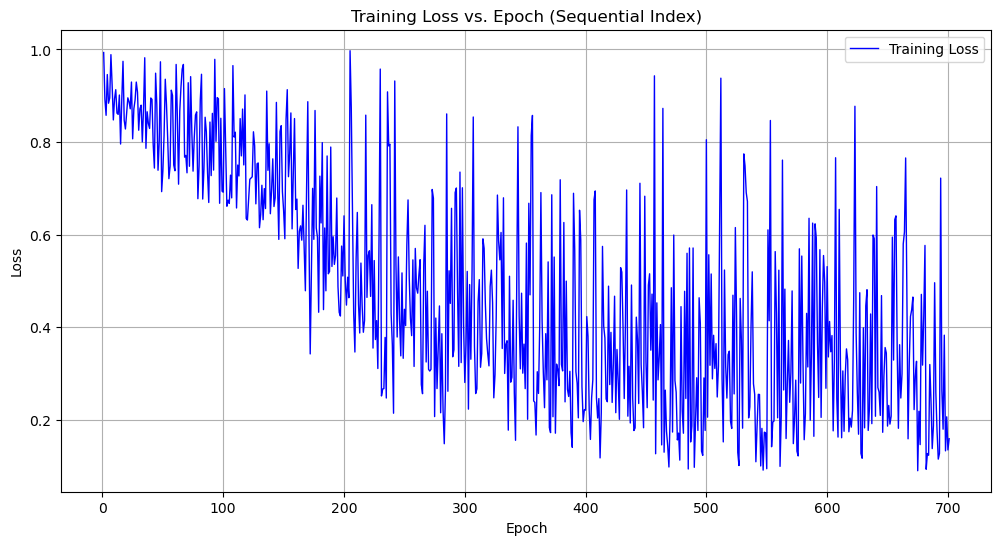

In [4]:
import re
import matplotlib.pyplot as plt

def parse_epoch_loss(file_path, max_iterations=296*50):
    """
    Parses epoch loss from a file, limiting the number of iterations.

    Args:
        file_path: Path to the log file.
        max_iterations: Maximum number of iterations to read.

    Returns:
        A tuple of lists: (epochs, losses).  Epochs are sequentially numbered starting from 1.
    """
    epochs = []
    losses = []
    current_epoch = 1  # Initial Epoch starts from 1
    iteration_count = 0

    with open(file_path, 'r') as file:
        for line in file:
            if iteration_count >= max_iterations:
                break  # Stop reading after max_iterations

            if line.startswith('Epoch'):
                # Match format: Epoch: [1][...] ... Loss 9.8914e-01
                match = re.search(r'Epoch:\s*\[\d+\].*Loss\s+([0-9\.e+-]+)', line)
                if match:
                    loss = float(match.group(1))
                    epochs.append(current_epoch)
                    losses.append(loss)
                    current_epoch += 1  # Increment Epoch number for each Epoch line

            iteration_count += 1  # Increment iteration count for each line read

    return epochs, losses

def plot_epoch_loss(epochs, losses):
    """
    Plots the training loss vs. epoch.

    Args:
        epochs: List of epoch numbers.
        losses: List of corresponding loss values.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, losses, 'b-', linewidth=1, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Epoch (Sequential Index)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
file_path = "C:/Users/LENOVO/Desktop/fsdownload/brats2020_1158633.out"  # Replace with your file path
max_iterations = 296 * 3
epochs, losses = parse_epoch_loss(file_path, max_iterations)
plot_epoch_loss(epochs, losses)
